# Proyecto: Análisis de mercado inmobiliario


## 1. Aproximacion - Datos

Los datos que ayudarian a resolver la problematica, es un set de datos con caracteristicas de propiedades ya evaluadas, es decir, definimos los aspectos mas importantes en el avaluo de una propiedad junto con su respectivo precio.

Los aspectos mas importantes generalmente al evaluar el precio de una propiedad son los siguientes:

- Ubicacion de la propiedad
- Calidad de la infraestructura de la propiedad
- Estetica y aspecto de la propiedad
- Tamaño de la propiedad
- Tamaño de la propiedad habitable

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [2]:
df = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

In [4]:
df.isnull().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

['Casa', 'Casa de campo', 'Cochera', 'Departamento', 'Depósito', 'Local comercial', 'Lote', 'Oficina', 'Otro', 'PH']


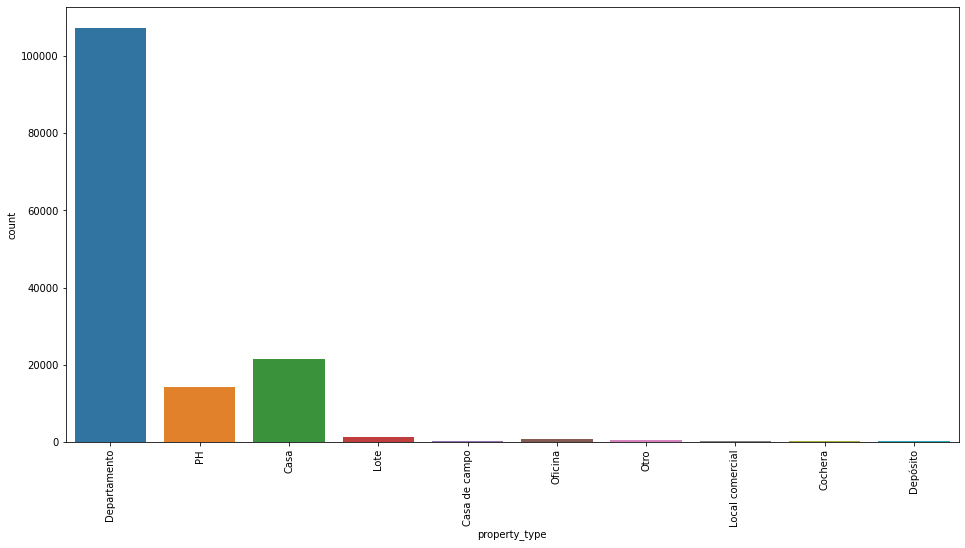

In [5]:
plt.figure(figsize=(8,8))
sns.countplot(x= 'property_type', data = df)
plt.xticks(rotation = 90)

print([prop for prop in np.unique(df.property_type.values)])

La mayoria de los datos son departamentos, seguido de lejos por las casas, los penthouses, y en muy menos proporcion los lotes, las oficinas, y los demas datos.

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

<AxesSubplot:xlabel='l2', ylabel='count'>

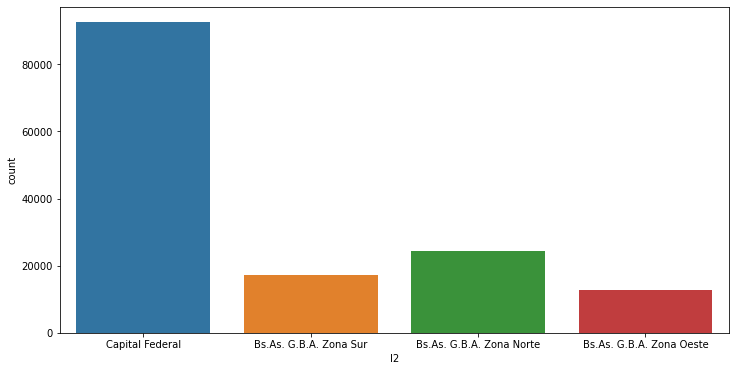

In [6]:
ax1 = plt.figure(figsize=(12, 6))
sns.countplot(x= 'l2', data = df)

La mayoria de los datos hacen parte de la Capital Federal, seguido muy de lejos por las regiones del Gran Buenos Aires.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88]),
 [Text(0, 0, 'San Cristobal'),
  Text(1, 0, 'Boedo'),
  Text(2, 0, 'Palermo'),
  Text(3, 0, 'La Plata'),
  Text(4, 0, 'Villa Crespo'),
  Text(5, 0, 'Parque Patricios'),
  Text(6, 0, 'Villa Pueyrredón'),
  Text(7, 0, 'Pilar'),
  Text(8, 0, 'Tigre'),
  Text(9, 0, 'Abasto'),
  Text(10, 0, 'Flores'),
  Text(11, 0, 'Morón'),
  Text(12, 0, 'Nuñez'),
  Text(13, 0, 'Almagro'),
  Text(14, 0, 'Belgrano'),
  Text(15, 0, 'Floresta'),
  Text(16, 0, 'Recoleta'),
  Text(17, 0, 'Balvanera'),
  Text(18, 0, 'Caballito'),
  Text(19, 0, 'Chacarita'),
  Text(20, 0, 'San Telmo'),
  Text(21, 0, 'Colegiales'),


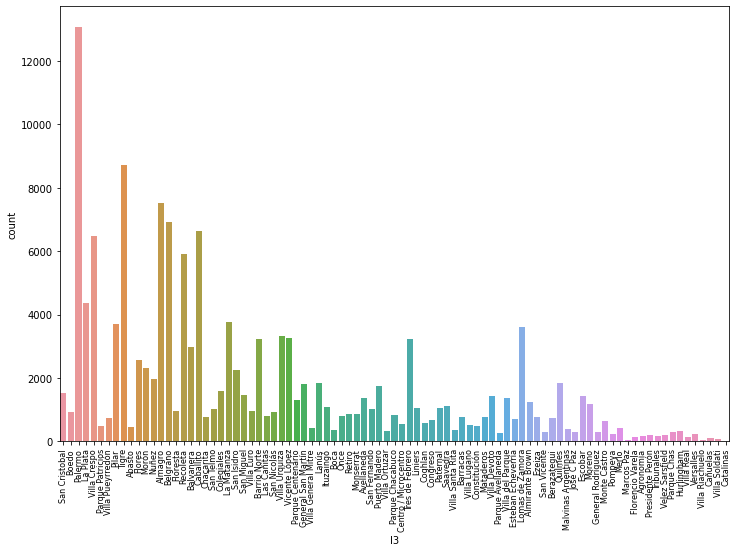

In [7]:
ax2 = plt.figure(figsize=(12,8))
sns.countplot(x= 'l3', data = df)
plt.xticks(fontsize= 8,rotation = 90)

El mayor numero de propiedades publicadas se encuentran en el barrio Palermo, seguido de Pilar, Amagro, Belgrano, Caballito, la Plata, Recolleta, estos mencionados conforman el grueso del dataset.

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [8]:
df = df[df['l2'] == df.l2.value_counts().index[0]].copy()

In [9]:
df= df[df['property_type'].isin(df.property_type.value_counts().index[0:3].to_list())].copy()

In [10]:
df.shape

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [11]:
inte_col = ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']
df[inte_col].describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


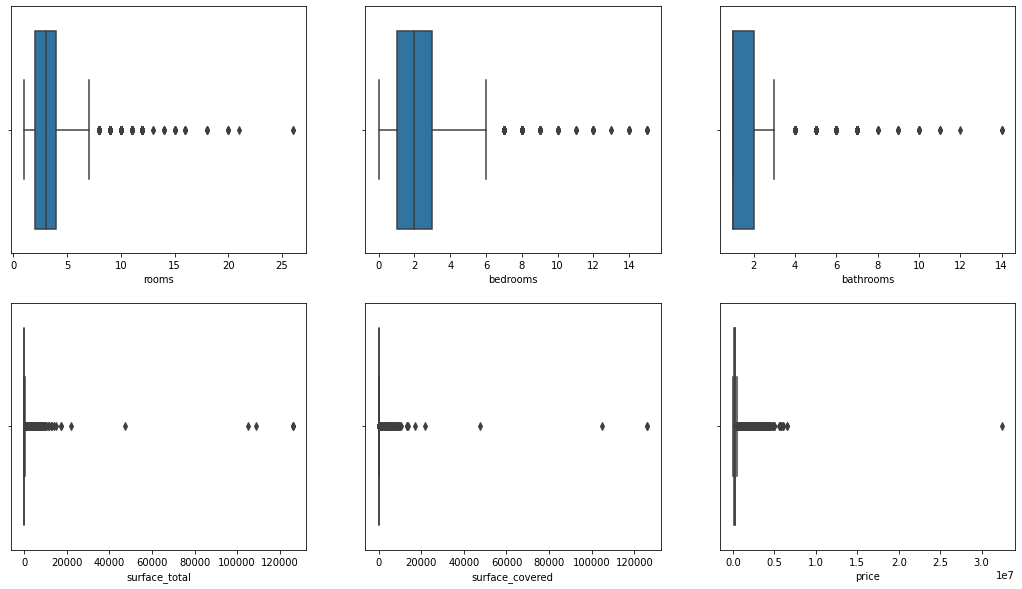

In [12]:
plt.figure(figsize=(18,10))
for i, col in enumerate(inte_col):
    plt.subplot(2,3, i+1)
    sns.boxplot(x= col, data = df)

Se infiere que la mayoria de propiedades publicadas tienen 3 cuartos, 2 habitaciones, 1 baño. Acerca de la superficie total, la superficie cubierta y el precio, no se es posible concluir algo, debido a la presencia de outliers. 

In [13]:
def remove_outlier_nulls(dataframe, columnas):
    for columna in columnas:
        dataframe.drop(dataframe[dataframe[columna].isnull()].index, inplace =True)
        q1, q3 = np.quantile( dataframe[columna] , [0.25, 0.75] )
        iqr = q3 - q1
        dataframe.drop(dataframe[(dataframe[columna] > 1.5*iqr+q3) | (dataframe[columna] < q1-1.5*iqr )].index, inplace =True)
    

In [14]:
remove_outlier_nulls(df, inte_col)
df.drop(df[df['surface_total']<df['surface_covered']].index, inplace = True)
df.shape

(65846, 19)

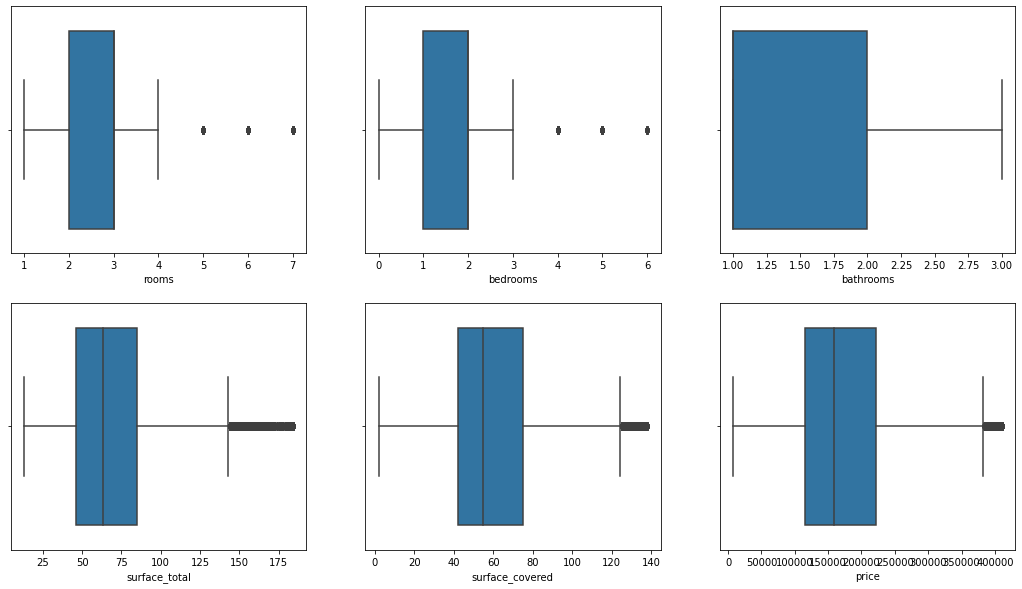

In [15]:
plt.figure(figsize=(18,10))
for i, col in enumerate(inte_col):
    plt.subplot(2,3, i+1)
    sns.boxplot(x= col, data = df)

Despues de remover los datos atipicos, se concluye que las medias de todas las variables son: 3 cuartos, 2 habitaciones, 1 baños, con superficies totales de 63 m2, con superficies cubiertas de 50 m2 con precio de 160 000 

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.]),
 [])

<Figure size 1440x1152 with 0 Axes>

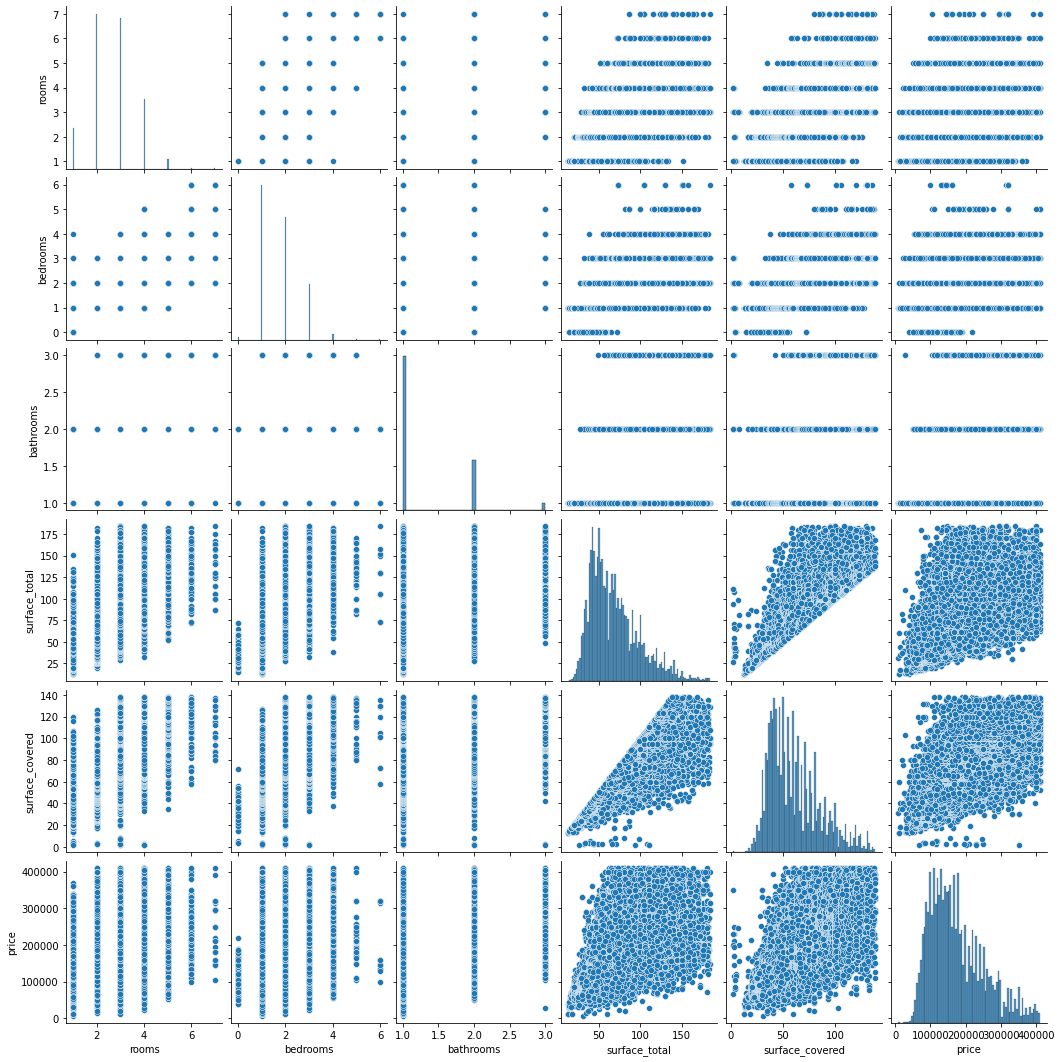

In [16]:
plt.figure(figsize=(20,16))
sns.pairplot(df[inte_col])
plt.xticks(rotation = 90)

Debido a la naturaleza discreta de las variables, el grafico de puntos no permite apreciar relaciones entre los baños, habitaciones y cuartos. En cuanto a las superficies, hay una relaciones lineal entre las superficies y el precio.

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

<AxesSubplot:>

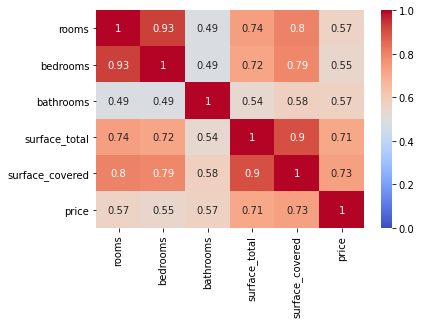

In [17]:
sns.heatmap(df[inte_col].corr(), vmin= 0, vmax = 1, annot = True, cmap = 'coolwarm')

Se observa hay relacion positiva entre el precio y las demas variables. Ademas como era de esperarse, a mayor superficie, se espera un mayor numero de cuartos, habitaciones y baños, esto a su vez guarda una estrecha relacion con el precio de la propiedad.

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [18]:
df1 = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
df1.shape

(146660, 19)

In [19]:
df1 = df1[df1['l2'] == 'Capital Federal'].copy()
df1 = df1[df1['property_type'].isin(['Departamento', 'PH', 'Casa'])].copy()
df1 = df1[(df1['surface_total'] >= 15) & (df1['surface_total'] <= 1000)].copy()
df1.drop([col for col in df1.columns if col not in inte_col], axis =1, inplace = True)
df1.drop(df1[df1['price'] > 4000000].index, inplace = True)
df1.dropna(inplace = True)


df1.shape

(81019, 6)

In [20]:
y = df1['price']
X = df1.drop('price', axis = 1)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test = train_test_split( X, y, test_size = 0.2, random_state = 1 )

## Modelos Benchmark

Como modelos benchmark se proponen, la regresion lineal, el arbol de decision y k vecinos mas cercanos con parametros por default. Se procede a comparar estos 3 metodos.

La metrica usada para la calificacion de los algoritmos regresivos fue:

## R2 - Coeficiente de Determinacion

En estadística, el coeficiente de determinación, denominado R2 o r2 y pronunciado "R al cuadrado", es la proporción de la varianza de la variable dependiente que es predecible a partir de la(s) variable(s) independiente(s).

Es una estadística utilizada en el contexto de los modelos estadísticos cuyo objetivo principal es la predicción de resultados futuros o la comprobación de hipótesis, a partir de otra información relacionada. Proporciona una medida de lo bien que el modelo reproduce los resultados observados, basándose en la proporción de la variación total de los resultados explicada por el modelo[1][2][3].

Existen varias definiciones de R2 que sólo a veces son equivalentes. Una clase de estos casos es la de la regresión lineal simple, en la que se utiliza r2 en lugar de R2. Cuando se incluye un intercepto, entonces r2 es simplemente el cuadrado del coeficiente de correlación muestral (es decir, r) entre los resultados observados y los valores predictivos observados[4] Si se incluyen regresores adicionales, R2 es el cuadrado del coeficiente de correlación múltiple. En ambos casos, el coeficiente de determinación suele oscilar entre 0 y 1.

Hay casos en los que la definición computacional de R2 puede arrojar valores negativos, dependiendo de la definición utilizada. Esto puede ocurrir cuando las predicciones que se comparan con los resultados correspondientes no se han derivado de un procedimiento de ajuste del modelo utilizando esos datos. Incluso si se ha utilizado un procedimiento de ajuste del modelo, R2 puede seguir siendo negativo, por ejemplo, cuando se realiza una regresión lineal sin incluir un intercepto,[5] o cuando se utiliza una función no lineal para ajustar los datos[6] En los casos en los que surgen valores negativos, la media de los datos proporciona un mejor ajuste a los resultados que los valores de la función ajustada, según este criterio concreto.

**Un artículo publicado en la revista PeerJ Computer Science en 2021 afirma que el coeficiente de determinación es más veraz que el SMAPE, el MAE, el MAPE, el MSE y el RMSE en la evaluación del análisis de regresión[7]**

- [1] Steel, R. G. D.; Torrie, J. H. (1960). Principles and Procedures of Statistics with Special Reference to the Biological - Sciences. McGraw Hill.
- [2] Glantz, Stanton A.; Slinker, B. K. (1990). Primer of Applied Regression and Analysis of Variance. McGraw-Hill. ISBN 978-0-07-023407-9.
- [3] Draper, N. R.; Smith, H. (1998). Applied Regression Analysis. Wiley-Interscience. ISBN 978-0-471-17082-2.
- [4] Devore, Jay L. (2011). Probability and Statistics for Engineering and the Sciences (8th ed.). Boston, MA: Cengage Learning. pp. 508–510. ISBN 978-0-538-73352-6.
- [5]Barten, Anton P. (1987). "The Coeffecient of Determination for Regression without a Constant Term". In Heijmans, Risto; Neudecker, Heinz (eds.). The Practice of Econometrics. Dordrecht: Kluwer. pp. 181–189. ISBN 90-247-3502-5.
- [6]Colin Cameron, A.; Windmeijer, Frank A.G. (1997). "An R-squared measure of goodness of fit for some common nonlinear regression models". Journal of Econometrics. 77 (2): 1790–2. doi:10.1016/S0304-4076(96)01818-0.
- [7]Chicco, Davide; Warrens, Matthijs J.; Jurman, Giuseppe (2021). "The coefficient of determination R-squared is more informative than SMAPE, MAE, MAPE, MSE and RMSE in regression analysis evaluation". PeerJ Computer Science. 7 (e623): 1–24. doi:10.7717/peerj-cs.623



Text(0, 0.5, 'Precios')

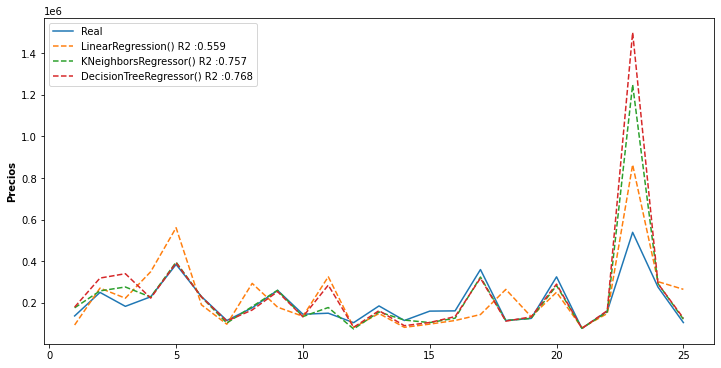

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score , mean_squared_error

lr = LinearRegression()
knr = KNeighborsRegressor()
tree = DecisionTreeRegressor()

models = [lr, knr, tree]
y_pred =pd.DataFrame()
r2s ={}
num_datos = np.arange (1, len(y_test)+1 , 1)

plt.figure(figsize= (12, 6))
plt.plot(num_datos[:25], y_test[:25], '-', label = 'Real')

for model in models:
    
    model.fit(X_train, y_train)
    y_pred[model] = model.predict(X_test)
    r2= r2_score(y_test, y_pred[model])
    r2s[str(model)] = r2.round(3)
    
    
    plt.plot(num_datos[:25], y_pred[model][:25], '--', label = str(model) + ' R2 :' +str(r2.round(3)))
    plt.legend()
    plt.show
    

plt.ylabel('Precios', fontweight = 'bold')

In [23]:
r2s

{'LinearRegression()': 0.559,
 'KNeighborsRegressor()': 0.757,
 'DecisionTreeRegressor()': 0.768}

Si observamos detenidamente, de los modelos benchmark, el arbol de decision es muy bueno prediciendo los costes, a excepcion de los valores cuyo precio es relativamente alto. La regresion lineal es el modelo mas conservador de los 3, sin embargo es el que mas se aleja de los valores reales.

## K Vecinos mas cercanos con peso Uniforme

Maximo puntaje obtenido 0.757


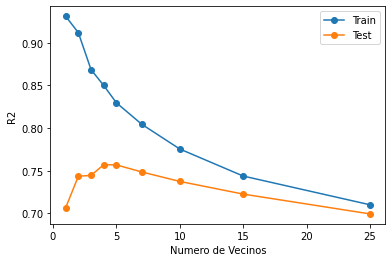

In [24]:
n_neighbors = [1,2,3,4,5,7,10,15,25]
r2_score_train = []
r2_score_test= []

for n in n_neighbors:
    knr = KNeighborsRegressor(n_neighbors = n, weights = 'uniform')
    knr.fit(X_train, y_train)
    y_pred_test = knr.predict(X_test)
    y_pred_train =knr.predict(X_train)
    r2_score_test.append(r2_score(y_test, y_pred_test))
    r2_score_train.append(r2_score(y_train, y_pred_train))

plt.plot(n_neighbors, r2_score_train, 'o-', label = 'Train')
plt.plot(n_neighbors, r2_score_test, 'o-', label = 'Test')
plt.legend()
plt.xlabel('Numero de Vecinos')
plt.ylabel('R2')

print(f'Maximo puntaje obtenido {max(r2_score_test).round(3)}')

In [25]:
r2_score_test

[0.7064842137534572,
 0.7434834434923718,
 0.74445753993168,
 0.7569676241093195,
 0.7567379889244435,
 0.7484828721706425,
 0.7373773543211853,
 0.7225239493658931,
 0.6992915209079489]

El mejor R2 obtenido fue 0.757 con 5 clusters, a partir de este punto se puede observar como el valor de R2 disminuye debido a que el inderfitting aumenta conforme aumentan los vecinos, debido a que los pesos en el ponderado son iguales para cada vecino considerado.

## K Vecinos mas cercanos con peso proporcional a la Distancia

Maximo puntaje obtenido 0.827


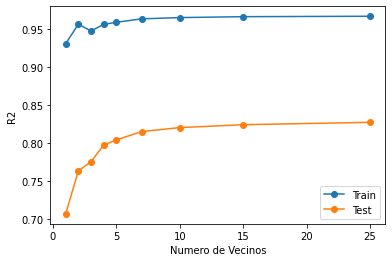

In [26]:
from sklearn.neighbors import KNeighborsRegressor

n_neighbors = [1,2,3,4,5,7,10,15,25]
r2_score_train = []
r2_score_test= []

for n in n_neighbors:
    knr = KNeighborsRegressor(n_neighbors = n, weights = 'distance')
    knr.fit(X_train, y_train)
    y_pred_test = knr.predict(X_test)
    y_pred_train =knr.predict(X_train)
    r2_score_test.append(r2_score(y_test, y_pred_test))
    r2_score_train.append(r2_score(y_train, y_pred_train))

plt.plot(n_neighbors, r2_score_train, 'o-', label = 'Train')
plt.plot(n_neighbors, r2_score_test, 'o-', label = 'Test')
plt.legend()
plt.xlabel('Numero de Vecinos')
plt.ylabel('R2')

print(f'Maximo puntaje obtenido {max(r2_score_test).round(3)}')

In [27]:
r2_score_test

[0.7064842137534572,
 0.7632837183322047,
 0.7753231002685564,
 0.7972278090083507,
 0.8041548202022659,
 0.8150916572787826,
 0.82031551492821,
 0.8241150157210589,
 0.8272743681484552]

La modificacion de pesos proporcionales a las distancias añadido para cada vecino, mejora considerablemente la precision de la prediccion, el puntaje R2 no disminuye con el aumento del numero de vecinos, ya que entre mas alejado se encuentre el vecino, menor es la influencia que tiene sobre la prediccion.

## Arboles de Decision

Maximo puntaje obtenido 0.779


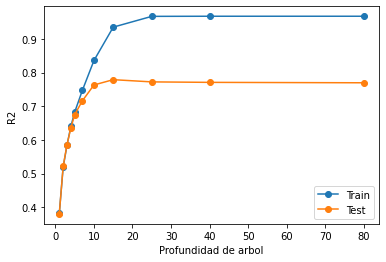

In [28]:
profundidades = [1,2,3,4,5,7,10,15,25,40,80]
r2_score_train = []
r2_score_test = []

for prof in profundidades:
    
    tree = DecisionTreeRegressor(max_depth = prof)
    tree.fit(X_train, y_train)
    y_test_pred = tree.predict(X_test)
    y_train_pred = tree.predict(X_train)
    r2_score_test.append(r2_score(y_test, y_test_pred))
    r2_score_train.append(r2_score(y_train, y_train_pred))
    
plt.plot(profundidades, r2_score_train, 'o-', label = 'Train')
plt.plot(profundidades, r2_score_test, 'o-', label = 'Test')
plt.legend()
plt.xlabel('Profundidad de arbol')
plt.ylabel('R2')

print(f'Maximo puntaje obtenido {max(r2_score_test).round(3)}')

In [29]:
r2_score_test

[0.38004772360205263,
 0.521053588835666,
 0.5856091181946359,
 0.6356416181639066,
 0.6750895276433186,
 0.7163088637646802,
 0.7632193489307066,
 0.7789124197976212,
 0.772319730255536,
 0.7709230468364633,
 0.7696791492322738]

El arbol de decision, rinde mejor que el algoritmo KNR sin distancias, sin embargo lo hace peor que KNR con modificacion. Este algoritmo mejora su rendimiento hasta la 10ma rama, apartir de este punto su rendimiento se estanca, debido a que el numero de ramas optimo, es mayor que su maximo.

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


Se busca hallar si la localizacion de la propiedad puede mejorar la prediccion, como es de conocimiento popular, en las ciudades, gran parte del valor de una propiedad depende de sus localizacion.

Ademas se busca simplificar el procesamiento, ya que al observar el anterior mapa de calor de relacion de las variables, se cree que los baños, habitaciones y cuartos, son predecidos por la variable, superficie total, ademas de que las posteriores variables no se ajustan bien para otros tipos de propiedades (Bodegas, oficinas ,etc)

In [30]:
df2 = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

In [31]:
df2.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [32]:
int_cols= ['lat', 'lon', 'surface_total', 'price']
df2.drop( [col for col in df2.columns if col not in int_cols], axis= 1, inplace = True)
df2.head()

,lat,lon,surface_total,price
0,-34.605880,-58.384949,140.0,153000.0
1,-34.624056,-58.412110,70.0,159000.0
2,-34.593569,-58.427474,45.0,125000.0
3,-34.581294,-58.436754,85.0,295000.0
4,-34.914194,-57.938219,50.0,40000.0


Se dejaron las unicas variables que se consideraron valiosas en el analisis (Espacio, y ubicacion)

In [33]:
remove_outlier_nulls(df2, ['surface_total', 'price'])

In [34]:
df2.dropna(inplace = True)

<AxesSubplot:xlabel='lon', ylabel='lat'>

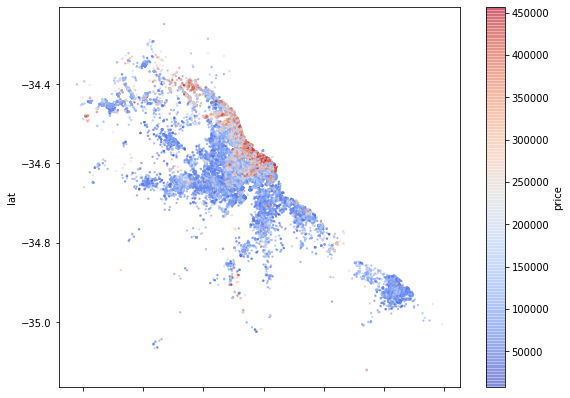

In [35]:
df2.plot(kind= 'scatter', x= 'lon', y= 'lat', figsize = (9, 7), alpha= 0.4, s = 2, c = 'price', cmap = 'coolwarm', colorbar= True)

Se observa que claramente hay una relacion entre la ubicacion de las propiedades con su precio, el mapa de calor tiene la forma de Buenos Aires, con las propiedades mas caras, alrededor de la costa y en el centro de la ciudad. Si un algoritmo es capaz de modelar esta situacion, las predicciones mejorarian en gran manera.

<AxesSubplot:>

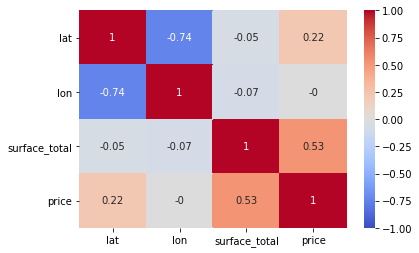

In [36]:
sns.heatmap(df2.corr().round(2), vmin= -1, vmax = 1, annot = True, cmap = 'coolwarm')

La correlacion entre longitud y latitud es debido a la forma de la ciudad, se encuentra que los precios de las propiedades aumentan conforme nos movemos hacia el sur, hay poca correlacion entre las variables, lo  cual es bueno por cuestiones de Multicolinearidad.

In [37]:
X = df2.drop('price', axis = 1)
y = df2['price'].copy()

X_train, X_test , y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 1)

Maximo puntaje obtenido 0.834


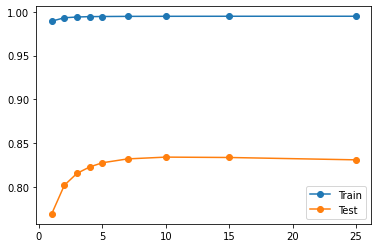

In [38]:
vecinos = [1,2,3,4,5,7,10,15,25]
r2_scores_train =[]
r2_scores_test = []

for n in vecinos:
    
    knr2 = KNeighborsRegressor(n_neighbors = n, weights = 'distance')
    knr2.fit(X_train, y_train)
    y_pred_test = knr2.predict(X_test)
    y_pred_train = knr2.predict(X_train)
    r2_scores_train.append(r2_score(y_train, y_pred_train))
    r2_scores_test.append(r2_score(y_test, y_pred_test))
    
plt.plot(vecinos, r2_scores_train, 'o-', label = 'Train' )
plt.plot(vecinos, r2_scores_test, 'o-', label = 'Test')
plt.legend()
print(f'Maximo puntaje obtenido {max(r2_scores_test).round(3)}')

In [39]:
r2_scores_test

[0.7691402851751068,
 0.8018670851045254,
 0.8154747212177731,
 0.822773117914801,
 0.8275464721703523,
 0.8319583109669295,
 0.83399209641563,
 0.8335655448116677,
 0.830877500607613]

Aplicando el algoritmo KNR modificado, se encuentra un ligera mejora en la prediccion comparado con el anterior, que ni tenia en cuenta las coordenadas de la propiedad. Al igual que en el anterior no se observa una disminucion de la precision conforme aumentan los vecinos debido a la disminucion de su efecto conforme aumenta su distancia.

Maximo puntaje obtenido 0.775


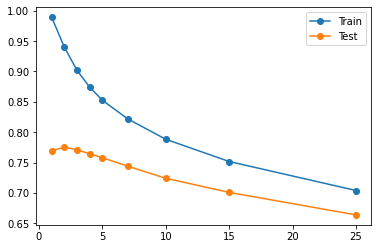

In [40]:
vecinos = [1,2,3,4,5,7,10,15,25]
r2_scores_train =[]
r2_scores_test = []

for n in vecinos:
    
    knr2 = KNeighborsRegressor(n_neighbors = n)
    knr2.fit(X_train, y_train)
    y_pred_test = knr2.predict(X_test)
    y_pred_train = knr2.predict(X_train)
    r2_scores_train.append(r2_score(y_train, y_pred_train))
    r2_scores_test.append(r2_score(y_test, y_pred_test))
    
plt.plot(vecinos, r2_scores_train, 'o-', label = 'Train' )
plt.plot(vecinos, r2_scores_test, 'o-', label = 'Test')
plt.legend()
print(f'Maximo puntaje obtenido {max(r2_scores_test).round(3)}')

Tambien se observa una mejora en comparacion con el KNR con diferentes variables, el maximo valor de r2 se obtiene con 2 vecinos, apartir de este valor la precision disminuye conforme aumenta el underfitting.

Maximo puntaje obtenido 0.819


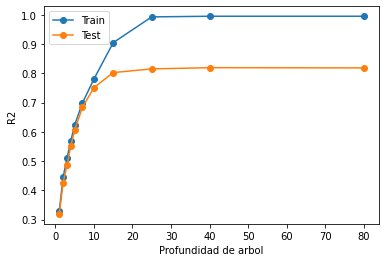

In [41]:
profundidades = [1,2,3,4,5,7,10,15,25,40,80]
r2_score_train = []
r2_score_test = []

for prof in profundidades:
    
    tree = DecisionTreeRegressor(max_depth = prof)
    tree.fit(X_train, y_train)
    y_test_pred = tree.predict(X_test)
    y_train_pred = tree.predict(X_train)
    r2_score_test.append(r2_score(y_test, y_test_pred))
    r2_score_train.append(r2_score(y_train, y_train_pred))
    
plt.plot(profundidades, r2_score_train, 'o-', label = 'Train')
plt.plot(profundidades, r2_score_test, 'o-', label = 'Test')
plt.legend()
plt.xlabel('Profundidad de arbol')
plt.ylabel('R2')

print(f'Maximo puntaje obtenido {max(r2_score_test).round(3)}')

Este algoritmo es el que mejor aprovecha la adicion de las variables de posicion, tiene una mejora de aprox 0.05 puntos en el R2 maximo. Al igual que su doble anterior, la precision se estanca al alcanzar cierto nivel de profundidad.

In [42]:
metodos = {'Nombre_condiciones' : ['Regresion lineal',
                                  'K Vecinos',
                                  'Arbol de decision',
                                  'K Vecinos',
                                   'K Vecinos Mod',
                                   'Arbol decision',
                                   'K Vecinos',
                                   'K Vecinos Mod',
                                   'Arbol decision' ],
          'Dataframe' : ['Guia',
                        'Guia',
                        'Guia',
                        'Guia',
                        'Guia',
                        'Guia',
                        'Reto',
                        'Reto',
                        'Reto'],
           
          'Hiperparametro' : ['Ninguno',
                             'Estandar',
                             'Estandar',
                             4,
                             25,
                             15,
                             2,
                             10,
                             15],
          'Valor R2': [0.559,
                      0.757,
                      0.769,
                       0.757,
                       0.827,
                       0.777,
                       0.834,
                       0.775,
                       0.816],
          'Notas' : ['Ninguna',
                    'Ninguna',
                    'Ninguna',
                    'No under - over fitting',
                    'No under - over fitting',
                    'Probablemente Overfitting',
                    'No under - over fitting',
                    'No under - over fitting',
                    'Probablemente Overfitting']}
pd.DataFrame(metodos)

,Nombre_condiciones,Dataframe,Hiperparametro,Valor R2,Notas
0,Regresion lineal,Guia,Ninguno,0.559,Ninguna
1,K Vecinos,Guia,Estandar,0.757,Ninguna
2,Arbol de decision,Guia,Estandar,0.769,Ninguna
3,K Vecinos,Guia,4,0.757,No under - over fitting
4,K Vecinos Mod,Guia,25,0.827,No under - over fitting
5,Arbol decision,Guia,40,0.777,Probablemente Overfitting
6,K Vecinos,Reto,2,0.834,No under - over fitting
7,K Vecinos Mod,Reto,10,0.775,No under - over fitting
8,Arbol decision,Reto,40,0.816,Probablemente Overfitting


## Modelo Final Elegido:

### K vecinos Mod:

Bajo mi criterio, creo que es el modelo que mejor se adapta a la prediccion del dataset, fue el que obtuvo una mayor metrica de r2 y ademas la dependencia de la distancia hace, que se adapte mejor a datos que no ha visto. Hace una aproximacion derivada de la similitud de los datos, teniendo en cuenta los datos que ha observado, mejora bastante con altos numeros de instancias ingresadas como entradas en el train.

## Cierre - Conclusiones

- La regresion lineal es un modelo sencillo y rapido de aplicar, util para predecir relaciones de primer orden entre las variables predictoras y la variable respuesta, es deficiente adaptandose a otro tipo de relaciones, y especialmente suceptible a la multicolinearidad.

- La profundidad del arbol de decision es dependiente del numero de variables predictoras, a menor numero de variables, menor el numero de nodos requeridos y es mayor la facilidad de analisis del arbol, se adapta muy bien a las variables sin preprocesamiento previo.

- El  modelo knn es un modelo sencillo, con muy buenas aproximaciones, especialmente si se añade el parametro de ponderacion de la distancia, sin embargo es muy vulnerable a que sobrerepresente una variable sin preprocesamiento, debido a que sus calculos son basados en distancias euclidianas.

- En algunos modelos existe una delgada linea entre under y overfitting, es de suma importancia graficar las metricas obtenidas para obtener un mejor desempeño.

- En este caso en especifico, tiene una mayor influencia un tratamiento y eleccion correcta de variables predictoras, mas que los modelos usados como tal.